# **NOTEBOOK 6:**
## County Statistics vs Diabetes Prevalence (Insurance Coverage)

Using the data frames created in Notebook 3 I will look for any correlations between diabetes prevalence and the percent of the population that is uninsured, connecting to data about income and poverty level.

After importing the data frames, I will make graphs for each factor and see how prevalence level (very low, low, medium, high, and very high) affects the data distribution.

### Set up data

In [51]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter('ignore')

### Load and inspect data

In [53]:
#import 2017 county data from Notebook 3
all_county_stats_2017_df = pd.read_csv('../data/diabetes_counties_2017_stats.csv')
all_county_stats_2017_df

,metro_nonmetro,county_name,state_abbr,db_prev,prev_level,prev_colorcode,metro_colorcode,pop2017,hs_grad_2017,some_college_2017,bachelors_2017,per_capita_income_2017,median_household_income_2017,poverty_2017,employed_2017,unemployed_2017,unemployment_rate_2017,uninsured_2017
0,metropolitan,anchorage municipality,AK,8.400030,low,green,blue,294356.0,93.4,35.0,34.6,38324.82,82271.0,8.1,146175.0,9287.0,5.97,13.2
1,metropolitan,fairbanks north star borough,AK,7.100060,low,green,blue,99703.0,94.6,39.8,33.1,34968.82,76250.0,7.7,43768.0,2940.0,6.29,10.2
2,metropolitan,matanuska-susitna borough,AK,8.900071,low,green,blue,106532.0,92.1,39.4,20.6,27306.48,74887.0,9.8,43292.0,4105.0,8.66,16.3
3,metropolitan,autauga county,AL,12.700204,high,orange,blue,55504.0,87.7,29.1,25.0,27841.70,55317.0,13.7,24908.0,1001.0,3.86,8.8
4,metropolitan,baldwin county,AL,10.300056,medium,yellow,blue,212628.0,90.2,31.6,30.7,27779.85,52562.0,11.8,87915.0,3652.0,3.99,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,nonmetropolitan,sweetwater county,WY,8.300101,low,green,red,43534.0,91.3,35.5,22.2,30282.59,71083.0,12.0,20599.0,982.0,4.55,12.4
3130,nonmetropolitan,teton county,WY,2.400087,very low,blue,red,23265.0,95.1,28.0,54.1,48557.37,80049.0,6.8,15005.0,462.0,2.99,11.7
3131,nonmetropolitan,uinta county,WY,10.300429,medium,yellow,red,20495.0,91.8,37.0,17.4,27048.12,54672.0,14.9,8727.0,411.0,4.50,13.5
3132,nonmetropolitan,washakie county,WY,10.700487,medium,yellow,red,8064.0,88.5,38.6,21.0,27494.83,51362.0,12.8,3947.0,168.0,4.08,16.8


In [54]:
#what is the shape of the data frame?
num_rows, num_cols = all_county_stats_2017_df.shape

print(f'Data frame has {num_rows} rows and {num_cols} columns.')

Data frame has 3134 rows and 18 columns.


## Intersection between Poverty and Insurance Coverage
### Is there a correlation?
### Does it connect to diabetes prevalence?

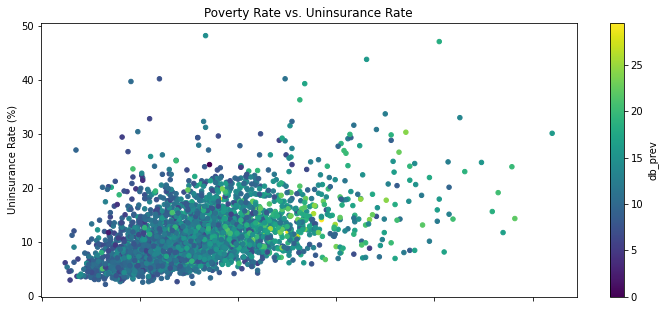

In [67]:
#make a graph for poverty rate vs uninsurance rate based on diabetes prevalence
all_county_stats_2017_df.plot(kind='scatter', x='poverty_2017', y='uninsured_2017',c='db_prev',figsize=(12,10))
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Uninsurance Rate (%)')
plt.title('Poverty Rate vs. Uninsurance Rate')
plt.subplots_adjust(bottom=0.5)
plt.show()

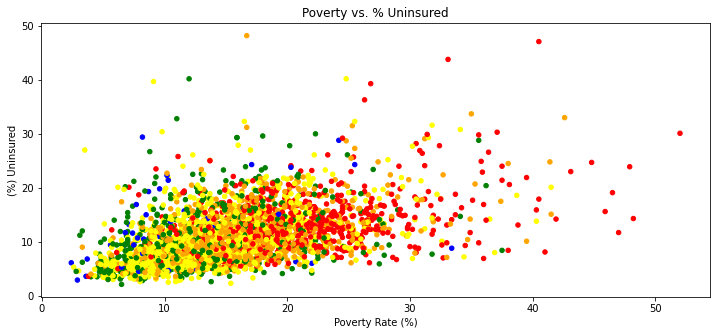

In [68]:
all_county_stats_2017_df.plot(kind='scatter', x='poverty_2017', y='uninsured_2017',c='prev_colorcode',figsize=(12,10))
plt.xlabel('Poverty Rate (%)')
plt.ylabel('(%) Uninsured')
plt.title('Poverty vs. % Uninsured')
plt.subplots_adjust(bottom=0.5)
plt.show()

## Intersection between Income and Insurance Coverage

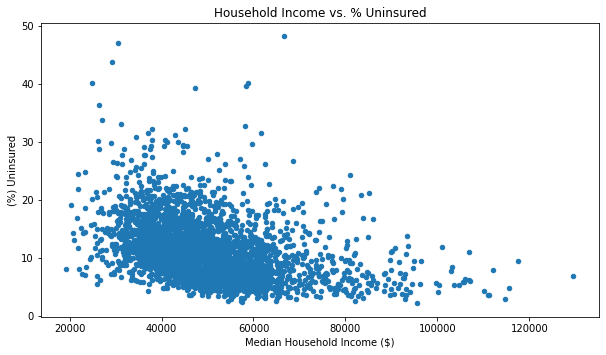

In [70]:
#make a graph for income vs uninsurance rate
all_county_stats_2017_df.plot(kind='scatter', x='median_household_income_2017', y='uninsured_2017',figsize=(10,6))
plt.xlabel('Median Household Income ($)')
plt.ylabel('(%) Uninsured')
plt.title('Household Income vs. % Uninsured')
plt.subplots_adjust(bottom=0.2)
plt.show()

### How does it correlate to diabetes prevalence?

#### Looking at median household income?

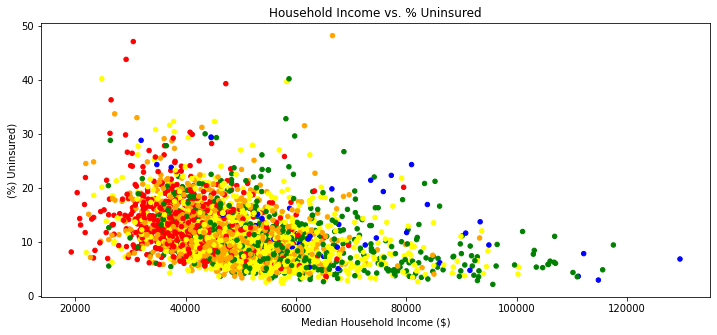

In [69]:
#make a graph for income vs uninsurance rate based on diabetes prevalence
#version 1, based on categorical prevalence data
all_county_stats_2017_df.plot(kind='scatter', x='median_household_income_2017', y='uninsured_2017',c='prev_colorcode',figsize=(12,10))
plt.xlabel('Median Household Income ($)')
plt.ylabel('(%) Uninsured)')
plt.title('Household Income vs. % Uninsured')
plt.subplots_adjust(bottom=0.5)
plt.show()

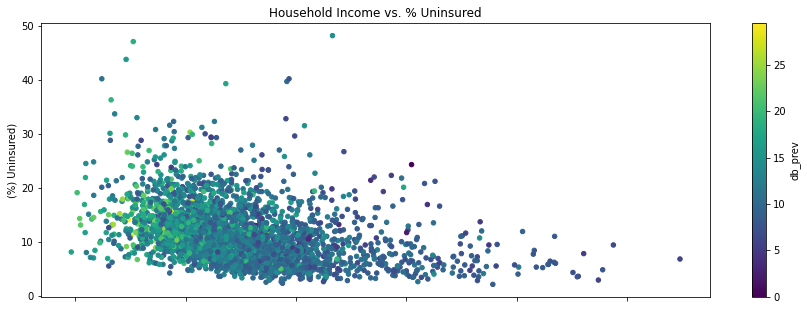

In [74]:
#make a graph for income vs uninsurance rate based on diabetes prevalence
#version 2
all_county_stats_2017_df.plot(kind='scatter', x='median_household_income_2017', y='uninsured_2017',c='db_prev',figsize=(15,10))
plt.xlabel('Median Household Income ($)')
plt.ylabel('(%) Uninsured)')
plt.title('Household Income vs. % Uninsured')
plt.subplots_adjust(bottom=0.5)
plt.show()

#### Looking at per capita income

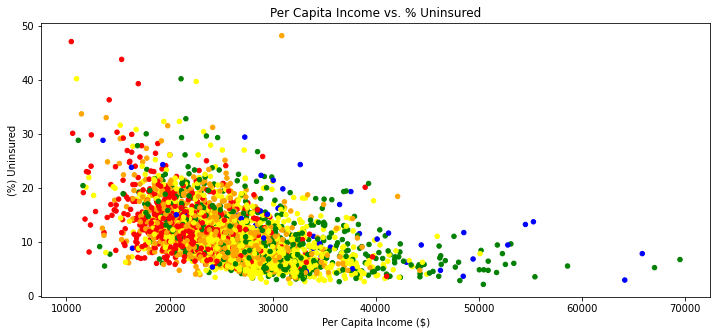

In [75]:
#make a graph for per capita income vs uninsurance rate based on diabetes prevalence
#version 1, based on categorical prevalence data
all_county_stats_2017_df.plot(kind='scatter', x='per_capita_income_2017', y='uninsured_2017',c='prev_colorcode',figsize=(12,10))
plt.xlabel('Per Capita Income ($)')
plt.ylabel('(%) Uninsured')
plt.title('Per Capita Income vs. % Uninsured')
plt.subplots_adjust(bottom=0.5)
plt.show()